<a href="https://colab.research.google.com/github/Karunya2655/GroupB_ZZSC9020/blob/main/GroupB_ZZSC9020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Mount Google Drive in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Navigate to the Directory in Google Drive:

In [ ]:
import os

project_path = '/content/drive/MyDrive/MyProject'  # Adjust the path according to your Drive structure
os.makedirs(project_path, exist_ok=True)  # Creates the directory if it doesn't exist
os.chdir(project_path)  # Changes the current working directory to the specified path


## 3. Clone the Repository into Drive

In [ ]:
!git clone https://github.com/Karunya2655/GroupB_ZZSC9020.git

fatal: destination path 'GroupB_ZZSC9020' already exists and is not an empty directory.


In [3]:
!git pull origin main

From https://github.com/Karunya2655/GroupB_ZZSC9020
 * branch            main       -> FETCH_HEAD
Already up to date.


## 4. Working with the Repository:
Whenever we start a new Colab session and want to work with this repository, we need to mount the Google Drive and navigate to the repository's diorectory again.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
repo_path ='/content/drive/MyDrive/MyProject/GroupB_ZZSC9020'  # Adjust the path according to your Drive structure
os.chdir(repo_path)


Mounted at /content/drive


# Organising NSW Data
We will generate a ZIP file from the segmented part files of the forecast demand data for NSW. This process involves specifying a base filename for the final ZIP file and identifying the part files derived from the segmented data.

In [ ]:
base_filename = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip')
part_filenames = [
    os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip.partaa'),
    os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip.partab')
]

with open(base_filename, 'wb') as output_file:
    for part_filename in part_filenames:
        with open(part_filename, 'rb') as input_file:
            output_file.write(input_file.read())

if os.path.exists(base_filename):
    print(f"Successfully combined the parts into {base_filename}")
    # Extract the ZIP file
    import zipfile
    with zipfile.ZipFile(base_filename, 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f"Contents of {base_filename} have been extracted.")
else:
    print("Failed to combine ZIP parts.")

Successfully combined the parts into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/forecastdemand_nsw.csv.zip
Contents of /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/forecastdemand_nsw.csv.zip have been extracted.


Importing zipfile module which is necessary for handline ZIP archive files. It provides a set of tools to create, read, write, append, and list a ZIP file's contents. When working with ZIP files, such as compressing files into a ZIP archive or extracting files from a ZIP archive, this module becomes indispensable due to its comprehensive functionality and ease of use.

In [4]:
import zipfile

## Extracting all data for NSW

In [5]:
zip_forecastdemand_nsw = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip')
zip_temperature_nsw = os.path.join(repo_path, 'data/NSW/temperature_nsw.csv.zip')
zip_totaldemand_nsw = os.path.join(repo_path, 'data/NSW/totaldemand_nsw.csv.zip')

extract_directory = os.path.join(repo_path, 'data/NSW/')

for zip_file in [zip_forecastdemand_nsw, zip_temperature_nsw, zip_totaldemand_nsw]:
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_directory)
            print(f"Extracted {zip_file} into {extract_directory}")
    else:
        print(f"The file {zip_file} does not exist.")

Extracted /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/forecastdemand_nsw.csv.zip into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/
Extracted /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/temperature_nsw.csv.zip into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/
Extracted /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/totaldemand_nsw.csv.zip into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/


In [6]:
import pandas as pd
import numpy as np

Locate and load the datasets and displaying the first few rows of each dataframe to verify

In [46]:
# Locate the data set
csv_forecast_nsw = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv')

# Temperature data from 2021-2024
csv_temperature_nsw = os.path.join(repo_path, 'data/NSW/temperature_nsw.csv')
csv_temperature_nsw_part2 = os.path.join(repo_path, 'data/NSW/historical_temp_data.csv')

# Demand data from 2012-2024
csv_totaldemand_nsw = os.path.join(repo_path, 'data/NSW/totaldemand_nsw.csv')
csv_totaldemand_nsw_part2 = os.path.join(repo_path, 'data/NSW/totaldemand_part2.csv')

# Load the datasets
df_forecast_nsw = pd.read_csv(csv_forecast_nsw)

df_temperature_nsw = pd.read_csv(csv_temperature_nsw)
df_temperature_nsw_part2 = pd.read_csv(csv_temperature_nsw_part2)

df_totaldemand_nsw = pd.read_csv(csv_totaldemand_nsw)
df_totaldemand_nsw_part2 = pd.read_csv(csv_totaldemand_nsw_part2)

# Display the first few rows of each dataframe to verify
print("Forecast Demand Head:")
print(df_forecast_nsw.head())

print("\nTemperature Data Head:")
print(df_temperature_nsw.head())

print("\nTemperature Part 2 Data Head:")
print(df_temperature_nsw_part2.head())

print("\nTotal Electricity Demand Head:")
print(df_totaldemand_nsw.head())

print("\nTotal Electricity Demand P2 Head:")
print(df_totaldemand_nsw_part2.head())

Forecast Demand Head:
   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2009123018     NSW1        71         7832.04  2009-12-30 12:31:49   
1        2009123019     NSW1        70         7832.04  2009-12-30 13:01:43   
2        2009123020     NSW1        69         7832.03  2009-12-30 13:31:36   
3        2009123021     NSW1        68         7832.03  2009-12-30 14:01:44   
4        2009123022     NSW1        67         7830.96  2009-12-30 14:31:35   

              DATETIME  
0  2010-01-01 00:00:00  
1  2010-01-01 00:00:00  
2  2010-01-01 00:00:00  
3  2010-01-01 00:00:00  
4  2010-01-01 00:00:00  

Temperature Data Head:
    LOCATION       DATETIME  TEMPERATURE
0  Bankstown  1/1/2010 0:00         23.1
1  Bankstown  1/1/2010 0:01         23.1
2  Bankstown  1/1/2010 0:30         22.9
3  Bankstown  1/1/2010 0:50         22.7
4  Bankstown  1/1/2010 1:00         22.6

Temperature Part 2 Data Head:
  Product code  Bureau of Meteorology station number

In [8]:
# Load population data set
csv_population_nsw = os.path.join(repo_path, 'data/NSW/nsw_population.csv')
df_population_nsw = pd.read_csv(csv_population_nsw)
print("\nPopulation Head:")
print(df_population_nsw.head())
print("\nPopulation Tail:")
print(df_population_nsw.tail())


Population Head:
   year  population
0  1971     4725503
1  1972     4795106
2  1973     4841898
3  1974     4894053
4  1975     4932016

Population Tail:
    year  population
65  2036     9404886
66  2037     9498738
67  2038     9592466
68  2039     9686079
69  2040     9779573


## Electricity Demand
Append new data to original data set

In [47]:
#first convert datetime formats for both datasets so they match

df_totaldemand_nsw['DATETIME'] = pd.to_datetime(df_totaldemand_nsw['DATETIME'],format='%d/%m/%Y %H:%M')

df_totaldemand_nsw_part2['DATETIME'] = pd.to_datetime(df_totaldemand_nsw_part2['DATETIME'],format='%Y/%m/%d %H:%M:%S')

print("\nTotal Electricity Demand Head:")
print(df_totaldemand_nsw.head())

print("\nTotal Electricity Demand P2 Head:")
print(df_totaldemand_nsw_part2.head())


Total Electricity Demand Head:
             DATETIME  TOTALDEMAND REGIONID
0 2010-01-01 00:00:00      8038.00     NSW1
1 2010-01-01 00:30:00      7809.31     NSW1
2 2010-01-01 01:00:00      7483.69     NSW1
3 2010-01-01 01:30:00      7117.23     NSW1
4 2010-01-01 02:00:00      6812.03     NSW1

Total Electricity Demand P2 Head:
             DATETIME  TOTALDEMAND REGIONID
0 2021-06-01 00:30:00      8279.21     NSW1
1 2021-06-01 01:00:00      8125.61     NSW1
2 2021-06-01 01:30:00      7938.76     NSW1
3 2021-06-01 02:00:00      7697.40     NSW1
4 2021-06-01 02:30:00      7435.94     NSW1


In [53]:
#checking the range of dates from each dataframe
df_totaldemand_nsw_part2 = df_totaldemand_nsw_part2.sort_values(by='DATETIME', ascending=True)

print("\nElectricity Demand Part 1 Tail:")
print(df_totaldemand_nsw.tail(5))
print("\nElectricity Demand Part 2 Head:")
print(df_totaldemand_nsw_part2.head(5))


Electricity Demand Part 1 Tail:
                  DATETIME  TOTALDEMAND REGIONID
196508 2021-03-17 22:00:00      7419.77     NSW1
196509 2021-03-17 22:30:00      7417.91     NSW1
196510 2021-03-17 23:00:00      7287.32     NSW1
196511 2021-03-17 23:30:00      7172.39     NSW1
196512 2021-03-18 00:00:00      7094.51     NSW1

Electricity Demand Part 2 Head:
                  DATETIME  TOTALDEMAND REGIONID
198816 2021-03-01 00:30:00      6947.85     NSW1
198817 2021-03-01 01:00:00      6769.28     NSW1
198818 2021-03-01 01:30:00      6499.29     NSW1
198819 2021-03-01 02:00:00      6336.15     NSW1
198820 2021-03-01 02:30:00      6243.42     NSW1


In [54]:
#just get records after 2021-03-18 00:00:00
df_totaldemand_nsw_part2 = df_totaldemand_nsw_part2[df_totaldemand_nsw_part2['DATETIME'] > '2021-03-18 00:00:00']
df_totaldemand_nsw_part2

,DATETIME,TOTALDEMAND,REGIONID
199632,2021-03-18 00:30:00,6906.74,NSW1
199633,2021-03-18 01:00:00,6733.61,NSW1
199634,2021-03-18 01:30:00,6443.75,NSW1
199635,2021-03-18 02:00:00,6226.25,NSW1
199636,2021-03-18 02:30:00,6109.74,NSW1
...,...,...,...
264283,2024-02-29 23:40:00,8400.71,NSW1
264284,2024-02-29 23:45:00,8242.18,NSW1
264285,2024-02-29 23:50:00,8350.55,NSW1
264286,2024-02-29 23:55:00,8256.00,NSW1


In [55]:
#Join the two demand dataframes
df_totaldemand_nsw = pd.concat([df_totaldemand_nsw, df_totaldemand_nsw_part2])
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1
...,...,...,...
264283,2024-02-29 23:40:00,8400.71,NSW1
264284,2024-02-29 23:45:00,8242.18,NSW1
264285,2024-02-29 23:50:00,8350.55,NSW1
264286,2024-02-29 23:55:00,8256.00,NSW1


Cut-off data on last reading of 2023

In [56]:
df_totaldemand_nsw = df_totaldemand_nsw[df_totaldemand_nsw['DATETIME'] < '2024-01-01 00:00:00']
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1
...,...,...,...
198810,2023-12-31 23:35:00,6645.82,NSW1
198811,2023-12-31 23:40:00,6649.50,NSW1
198812,2023-12-31 23:45:00,6631.86,NSW1
198813,2023-12-31 23:50:00,6649.77,NSW1


## Temperature Data
Append new data to the original data set

In [67]:
print("\nTemperature Part 1 Tail:")
print(df_temperature_nsw.tail(5))

print("\Temperature Demand Part 2 Head:")
print(df_temperature_nsw_part2.head(5))


Temperature Part 1 Tail:
         LOCATION         DATETIME  TEMPERATURE
220321  Bankstown  17/3/2021 23:00         19.1
220322  Bankstown  17/3/2021 23:20         19.0
220323  Bankstown  17/3/2021 23:30         18.8
220324  Bankstown  17/3/2021 23:34         18.8
220325  Bankstown   18/3/2021 0:00         18.6
\Temperature Demand Part 2 Head:
  Product code  Bureau of Meteorology station number  Year  Month  Day  \
0   IDCJAC0010                                 66137  1968      1    1   
1   IDCJAC0010                                 66137  1968      1    2   
2   IDCJAC0010                                 66137  1968      1    3   
3   IDCJAC0010                                 66137  1968      1    4   
4   IDCJAC0010                                 66137  1968      1    5   

   Maximum temperature (Degree C)  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                      

In [68]:
#drop uneeded columns, rename for consistency and remove earlier years
df_temperature_nsw_part2 = df_temperature_nsw_part2.drop(columns=['Product code',	'Bureau of Meteorology station number', 'Days of accumulation of maximum temperature', 'Quality'])
df_temperature_nsw_part2 = df_temperature_nsw_part2.rename(columns={
    'Year': 'year',
    'Month': 'month',
    'Day': 'day',
    'Maximum temperature (Degree C)': 'TEMPERATURE'
})
target_row = df_temperature_nsw_part2[(df_temperature_nsw_part2['year']== 2021) &
                            (df_temperature_nsw_part2['month'] == 3) &
                            (df_temperature_nsw_part2['day'] == 18)]

target_index = target_row.index
df_temperature_nsw_part2 = df_temperature_nsw_part2.loc[target_index[0]:]
print(df_temperature_nsw_part2.head(5))
print(df_temperature_nsw_part2.tail(5))

       year  month  day  TEMPERATURE
19435  2021      3   18         21.8
19436  2021      3   19         24.4
19437  2021      3   20         22.1
19438  2021      3   21         20.4
19439  2021      3   22         20.1
       year  month  day  TEMPERATURE
20536  2024      3   23         26.7
20537  2024      3   24         28.3
20538  2024      3   25         30.9
20539  2024      3   26         29.4
20540  2024      3   27         26.3


In [69]:
#drop LOCATION columnn in part 1 temp data
df_temperature_nsw = df_temperature_nsw.drop(columns=['LOCATION'])
df_temperature_nsw

,DATETIME,TEMPERATURE
0,1/1/2010 0:00,23.1
1,1/1/2010 0:01,23.1
2,1/1/2010 0:30,22.9
3,1/1/2010 0:50,22.7
4,1/1/2010 1:00,22.6
...,...,...
220321,17/3/2021 23:00,19.1
220322,17/3/2021 23:20,19.0
220323,17/3/2021 23:30,18.8
220324,17/3/2021 23:34,18.8


In [71]:
# Reformat original temperature data DATETIME to year, month, date

#convert from object to datetime
df_temperature_nsw["DATETIME"] = pd.to_datetime(df_temperature_nsw["DATETIME"],format='%d/%m/%Y %H:%M')

df_temperature_nsw["year"] = df_temperature_nsw["DATETIME"].dt.year
df_temperature_nsw["month"] = df_temperature_nsw["DATETIME"].dt.month
df_temperature_nsw["day"] = df_temperature_nsw["DATETIME"].dt.day

df_temperature_nsw.head(5)

,DATETIME,TEMPERATURE,year,month,day
0,2010-01-01 00:00:00,23.1,2010,1,1
1,2010-01-01 00:01:00,23.1,2010,1,1
2,2010-01-01 00:30:00,22.9,2010,1,1
3,2010-01-01 00:50:00,22.7,2010,1,1
4,2010-01-01 01:00:00,22.6,2010,1,1


In [72]:
#drop datetime
df_temperature_nsw = df_temperature_nsw.drop(columns=['DATETIME'])

# Move "TEMPERATURE" column to the last position
column_order = [col for col in df_temperature_nsw.columns if col != 'TEMPERATURE'] + ['TEMPERATURE']
df_temperature_nsw = df_temperature_nsw[column_order]
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,23.1
1,2010,1,1,23.1
2,2010,1,1,22.9
3,2010,1,1,22.7
4,2010,1,1,22.6
...,...,...,...,...
220321,2021,3,17,19.1
220322,2021,3,17,19.0
220323,2021,3,17,18.8
220324,2021,3,17,18.8


In [73]:
#drop last row as only one measure from original dataset for this day, we will take the 18th from part 2 data
df_temperature_nsw = df_temperature_nsw.drop(df_temperature_nsw.index[-1])
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,23.1
1,2010,1,1,23.1
2,2010,1,1,22.9
3,2010,1,1,22.7
4,2010,1,1,22.6
...,...,...,...,...
220320,2021,3,17,19.5
220321,2021,3,17,19.1
220322,2021,3,17,19.0
220323,2021,3,17,18.8


Transform to have only one value per day, the max temp, to match with added part 2 dataset



In [74]:
df_temperature_nsw = df_temperature_nsw.groupby(['year', 'month', 'day'])['TEMPERATURE'].max()
df_temperature_nsw = df_temperature_nsw.reset_index()
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,28.8
1,2010,1,2,29.4
2,2010,1,3,21.5
3,2010,1,4,23.9
4,2010,1,5,27.7
...,...,...,...,...
4086,2021,3,13,30.2
4087,2021,3,14,24.4
4088,2021,3,15,21.5
4089,2021,3,16,21.3


In [75]:
# Join the two temperature datasets

df_temperature_nsw = pd.concat([df_temperature_nsw, df_temperature_nsw_part2])
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,28.8
1,2010,1,2,29.4
2,2010,1,3,21.5
3,2010,1,4,23.9
4,2010,1,5,27.7
...,...,...,...,...
20536,2024,3,23,26.7
20537,2024,3,24,28.3
20538,2024,3,25,30.9
20539,2024,3,26,29.4


Cut-off temperature data at last record of 2023

In [76]:
df_temperature_nsw = df_temperature_nsw[df_temperature_nsw['year'] < 2024]
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,28.8
1,2010,1,2,29.4
2,2010,1,3,21.5
3,2010,1,4,23.9
4,2010,1,5,27.7
...,...,...,...,...
20449,2023,12,27,27.1
20450,2023,12,28,31.2
20451,2023,12,29,26.7
20452,2023,12,30,27.9


In [ ]:
#adding complete date field
df_temperature_nsw = df_temperature_nsw.copy() # Work with the copy of the DataFrame
df_temperature_nsw['date'] = pd.to_datetime(df_temperature_nsw[['year', 'month', 'day']])
df_temperature_nsw

,year,month,day,TEMPERATURE,date
0,2010,1,1,28.8,2010-01-01
1,2010,1,2,29.2,2010-01-02
2,2010,1,3,20.5,2010-01-03
3,2010,1,4,24.5,2010-01-04
4,2010,1,5,21.6,2010-01-05
...,...,...,...,...,...
20449,2023,12,27,27.1,2023-12-27
20450,2023,12,28,31.2,2023-12-28
20451,2023,12,29,26.7,2023-12-29
20452,2023,12,30,27.9,2023-12-30


## Complete Datasets
Here we have complete data sets for Temperature, total demand and Population

In [ ]:
# Temperature: df_temperature_nsw (2010-01-01 to 2023-12-31)
df_temperature_nsw

,year,month,day,TEMPERATURE,date
0,2010,1,1,28.8,2010-01-01
1,2010,1,2,29.2,2010-01-02
2,2010,1,3,20.5,2010-01-03
3,2010,1,4,24.5,2010-01-04
4,2010,1,5,21.6,2010-01-05
...,...,...,...,...,...
20449,2023,12,27,27.1,2023-12-27
20450,2023,12,28,31.2,2023-12-28
20451,2023,12,29,26.7,2023-12-29
20452,2023,12,30,27.9,2023-12-30


In [ ]:
# Electricity Demand: df_totaldemand_nsw (2010-01-01 to 2023-12-31)
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1
...,...,...,...
198810,2023-12-31 23:35:00,6645.82,NSW1
198811,2023-12-31 23:40:00,6649.50,NSW1
198812,2023-12-31 23:45:00,6631.86,NSW1
198813,2023-12-31 23:50:00,6649.77,NSW1


In [ ]:
# Population: df_population_nsw (1971 to 2040)
df_population_nsw

,year,population
0,1971,4725503
1,1972,4795106
2,1973,4841898
3,1974,4894053
4,1975,4932016
...,...,...
65,2036,9404886
66,2037,9498738
67,2038,9592466
68,2039,9686079


## a. Consolidate Data Source
Let's resample the total electricity demand and temperature data to half-hourly intervals if they're not already. Since the forecast demand is already in half-hourly increments, it might not need resampling. For the resampling, typically averaging the measurements within each half-hour period for the temperature, and sum or average for the total demand, depending on the nature of the data.

In [57]:
# Similar for total demand, specify numeric_only=True to avoid future warnings
df_totaldemand_nsw = df_totaldemand_nsw.set_index('DATETIME').resample('30T').mean(numeric_only=True).reset_index()
df_totaldemand_nsw

,DATETIME,TOTALDEMAND
0,2010-01-01 00:00:00,8038.000000
1,2010-01-01 00:30:00,7809.310000
2,2010-01-01 01:00:00,7483.690000
3,2010-01-01 01:30:00,7117.230000
4,2010-01-01 02:00:00,6812.030000
...,...,...
245419,2023-12-31 21:30:00,6971.670000
245420,2023-12-31 22:00:00,6877.370000
245421,2023-12-31 22:30:00,6795.615000
245422,2023-12-31 23:00:00,6671.048333


## b. Handling Missing Values
Let's check for null values and apply pandas interpolation for each missing values by taking the mean of the previous and next values. This approach is a form of linear interpolation and is suitable for time series data where missing values are expected to follow the trend of the neighboring points.

In [ ]:
# Check for missing values in each dataframe
df_forecast_nsw.info()
df_temperature_nsw.info()
df_totaldemand_nsw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906019 entries, 0 to 10906018
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PREDISPATCHSEQNO  int64  
 1   REGIONID          object 
 2   PERIODID          int64  
 3   FORECASTDEMAND    float64
 4   LASTCHANGED       object 
 5   DATETIME          object 
dtypes: float64(1), int64(2), object(3)
memory usage: 499.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 20453
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         5110 non-null   int64         
 1   month        5110 non-null   int64         
 2   day          5110 non-null   int64         
 3   TEMPERATURE  5110 non-null   float64       
 4   date         5110 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 239.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245

No missing value observed.

# Testing Australia Data - Not Required Now
We have 4 zip file for the Australia data. Let's extract all zip file containing in this folder on Extract folder.

In [ ]:
base_directory_au = os.path.join(repo_path, 'data/Australia')
extract_directory_au = os.path.join(base_directory_au, 'Extract')

zip_files = ['a.zip', 'b.zip', 'c.zip', 'd.zip']
os.makedirs(extract_directory_au, exist_ok=True)

for zip_file in zip_files:
    zip_file_path = os.path.join(base_directory_au, zip_file)

    if os.path.exists(zip_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_directory_au)
            print(f"Extracted {zip_file} into {extract_directory_au}")
    else:
        print(f"The file {zip_file_path} does not exist.")

Extracted a.zip into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/Australia/Extract
Extracted b.zip into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/Australia/Extract
Extracted c.zip into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/Australia/Extract
Extracted d.zip into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/Australia/Extract


Let's read all csv data from the Extract folder

In [ ]:
base_directory_au_extract = os.path.join(repo_path, 'data/Australia/Extract')

subdirectories = ['a', 'b', 'c', 'd']

# Iterate over each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(base_directory_au_extract, subdir)

    csv_files = [f for f in os.listdir(subdir_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_file_path = os.path.join(subdir_path, csv_file)

        print(f"Showing head of {csv_file} in {subdir} folder:")
        df = pd.read_csv(csv_file_path)
        print(df.head(), '\n')

Showing head of forecastdemand_vic.csv in a folder:
   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2016123018     VIC1        71         4160.74  2016-12-30 12:31:25   
1        2016123018     VIC1        72         3999.64  2016-12-30 12:31:25   
2        2016123018     VIC1        73         3836.30  2016-12-30 12:31:25   
3        2016123018     VIC1        74         3681.87  2016-12-30 12:31:25   
4        2016123018     VIC1        75         3457.38  2016-12-30 12:31:25   

              DATETIME  
0  2017-01-01 00:00:00  
1  2017-01-01 00:30:00  
2  2017-01-01 01:00:00  
3  2017-01-01 01:30:00  
4  2017-01-01 02:00:00   

Showing head of forecastdemand_sa.csv in b folder:
   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2016123018      SA1        71         1394.41  2016-12-30 12:31:25   
1        2016123018      SA1        72         1285.07  2016-12-30 12:31:25   
2        2016123018      SA1     

In [ ]:
import matplotlib.pyplot as plt

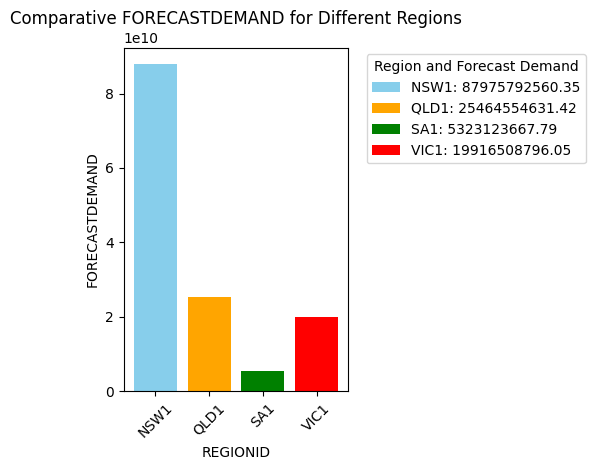

In [ ]:
subdirectories_forecast = ['a', 'b', 'c']

aggregate_data = pd.DataFrame()

# Iterate over each subdirectory and append data from each CSV file
for subdir in subdirectories_forecast:
    subdir_path = os.path.join(base_directory_au_extract, subdir)
    csv_files = [f for f in os.listdir(subdir_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_file_path = os.path.join(subdir_path, csv_file)

        # Read the CSV file and append it to the aggregate data
        df = pd.read_csv(csv_file_path)
        aggregate_data = pd.concat([aggregate_data, df])

# Append NSW data to the aggregate data
aggregate_data = pd.concat([aggregate_data, df_forecast_nsw])

# Group data by REGIONID and sum the FORECASTDEMAND
grouped_data = aggregate_data.groupby('REGIONID')['FORECASTDEMAND'].sum().reset_index()
colors = ['skyblue', 'orange', 'green', 'red']

# Plot each bar individually and create custom legends
for index, row in grouped_data.iterrows():
    plt.bar(row['REGIONID'], row['FORECASTDEMAND'], color=colors[index], label=f"{row['REGIONID']}: {row['FORECASTDEMAND']}")

plt.xlabel('REGIONID')
plt.ylabel('FORECASTDEMAND')
plt.title('Comparative FORECASTDEMAND for Different Regions')
plt.xticks(rotation=45)

# Adding legend outside the plot
plt.legend(title="Region and Forecast Demand", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
# We can't push because of GitHub size limit to 100MB

# !git config --global user.email "mail.santoshban@gmail.com"
# !git config --global user.name "santoshban"
# !git status
# !git add .
# !git commit -m "Some message"
# !git remote set-url origin https://santoshban:<PAT>@github.com/Karunya2655/GroupB_ZZSC9020.git
# !git push origin main


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime
import seaborn as sns
#sns.set()

# Exploratory Data Analysis - Updated

Data visualization of the Energy demard over the time

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from datetime import datetime

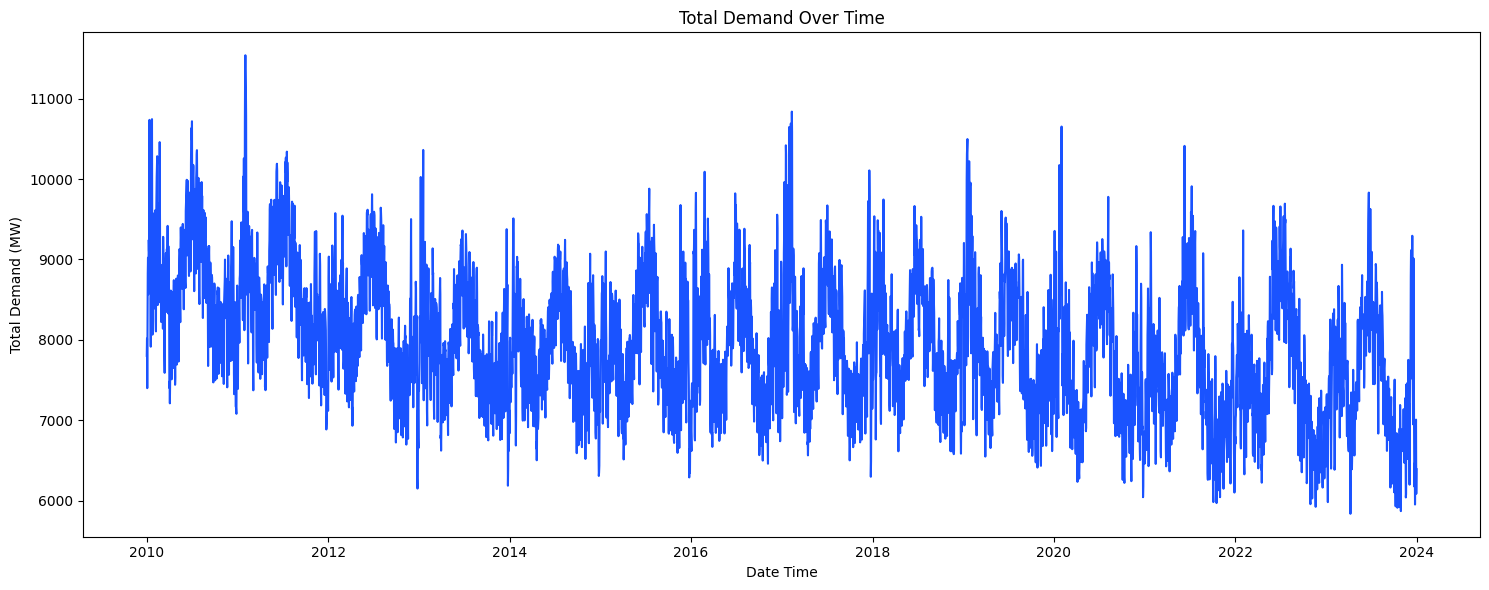

In [59]:
plt.figure(figsize=(15, 6))

# Without resampling
# plt.plot(df_totaldemand_nsw['DATETIME'], df_totaldemand_nsw['TOTALDEMAND'], marker='o', linestyle='-', markersize=4, color='#ffa300', markerfacecolor='#e60049')

# Resample the data for daily mean values
df_daily_totaldemand_nsw = df_totaldemand_nsw.resample('D', on='DATETIME').mean()
plt.plot(df_daily_totaldemand_nsw.index, df_daily_totaldemand_nsw['TOTALDEMAND'], linestyle='-', color='#1a53ff')


plt.title('Total Demand Over Time')
plt.xlabel('Date Time')
plt.ylabel('Total Demand (MW)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.show()


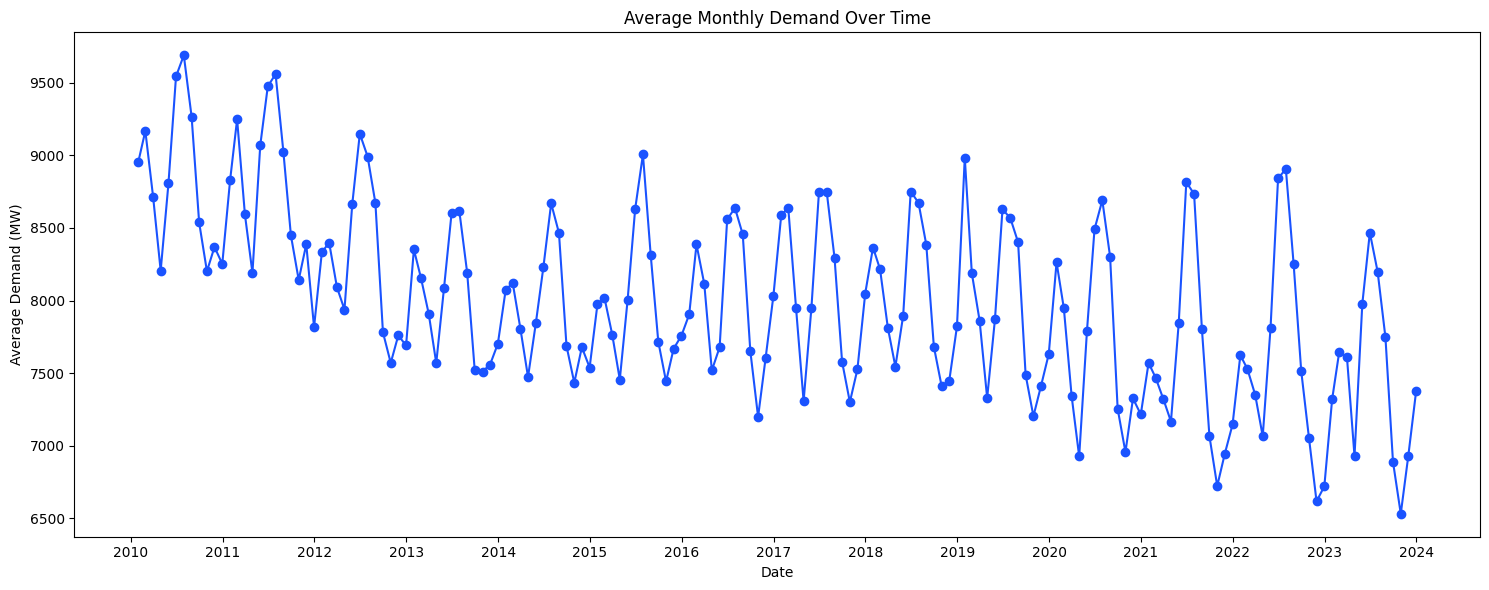

In [60]:
# Resample the data for monthly mean values
df_monthly_totaldemand_nsw = df_totaldemand_nsw.resample('M', on='DATETIME').mean(numeric_only=True)

plt.figure(figsize=(15, 6))
plt.plot(df_monthly_totaldemand_nsw.index, df_monthly_totaldemand_nsw['TOTALDEMAND'], linestyle='-', marker='o', color='#1a53ff')

plt.title('Average Monthly Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Average Demand (MW)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()


## For 2022 Only

In [62]:
# Filter for the year 2022
df_2022 = df_totaldemand_nsw[df_totaldemand_nsw['DATETIME'].dt.year == 2022]

In [63]:
# Sort the DataFrame just in case
df_2022_sorted = df_2022.sort_values('DATETIME', ascending=True)

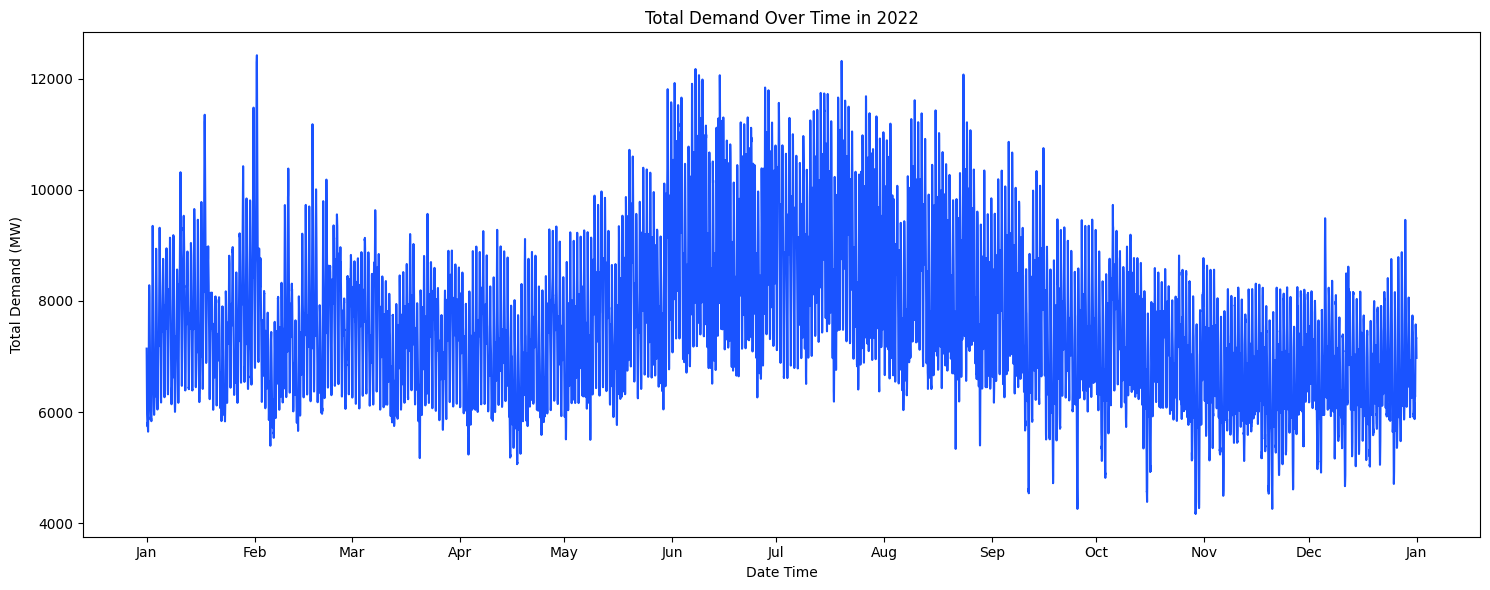

In [64]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_2022_sorted, x='DATETIME', y='TOTALDEMAND', color='#1a53ff')

plt.title('Total Demand Over Time in 2022')
plt.xlabel('Date Time')
plt.ylabel('Total Demand (MW)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()


## Divide year 2022 in 4 quarter

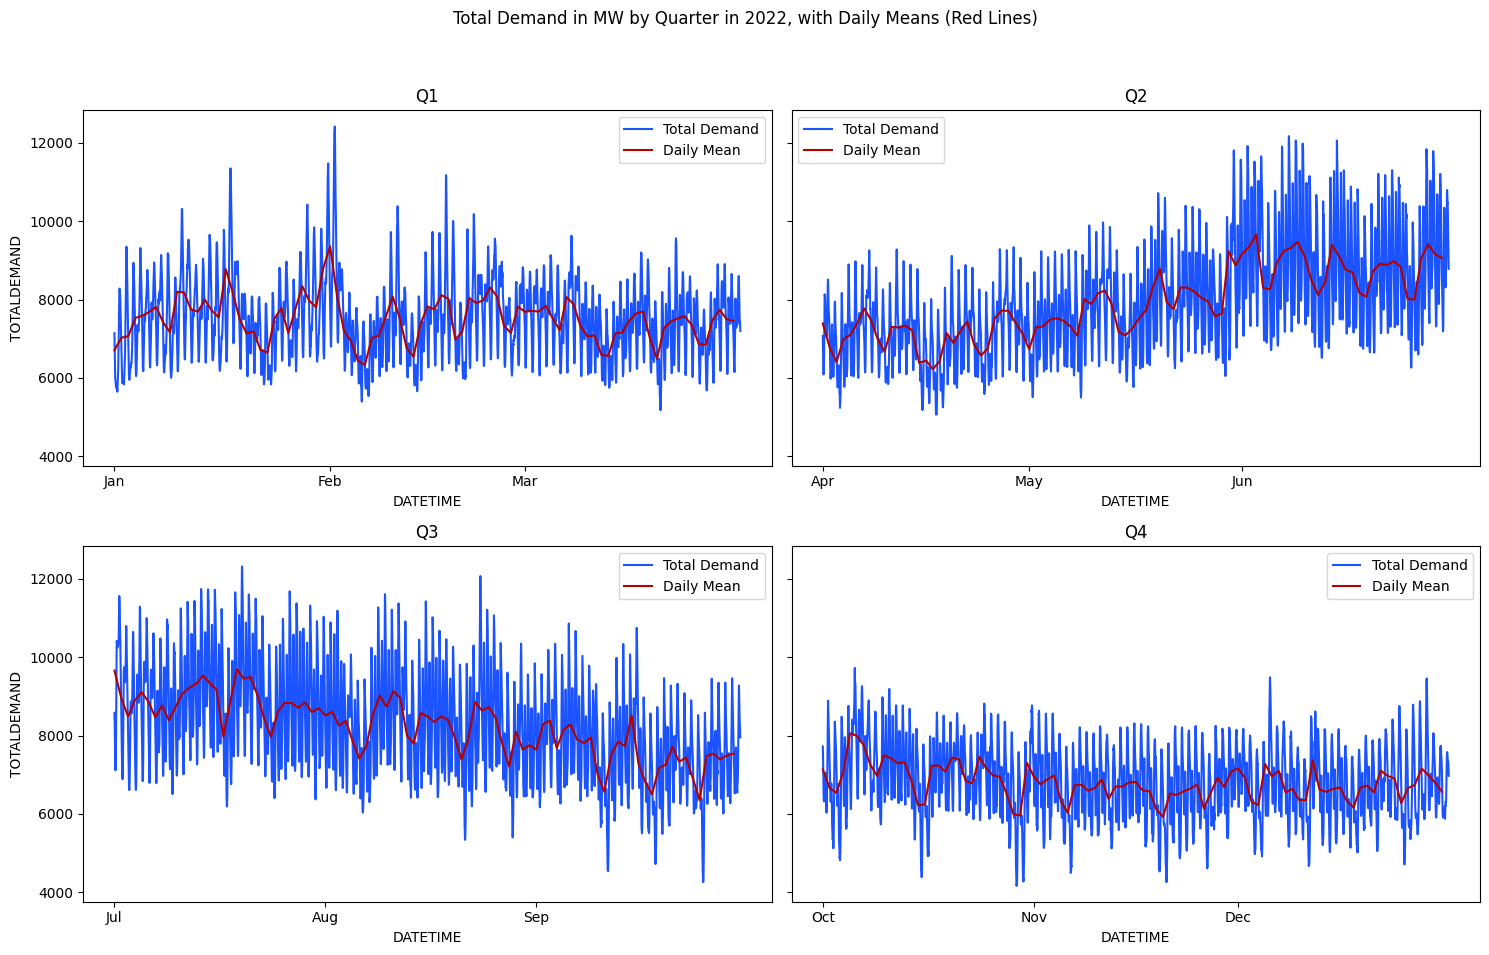

In [ ]:
df_daily_mean = df_2022.resample('D', on='DATETIME').mean().reset_index()

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Total Demand in MW by Quarter in 2022, with Daily Means (Red Lines)')

# Flatten axes for easy iteration
axes = axes.flatten()

# Quarter start months for labeling purposes
quarter_months = {
    1: ['Jan', 'Feb', 'Mar'],
    2: ['Apr', 'May', 'Jun'],
    3: ['Jul', 'Aug', 'Sep'],
    4: ['Oct', 'Nov', 'Dec']
}

# Loop through each quarter
for quarter in range(1, 5):
    # Filter the DataFrame for the quarter
    start_month = (quarter - 1) * 3 + 1
    end_month = start_month + 2
    df_quarter = df_2022[(df_2022['DATETIME'].dt.month >= start_month) & (df_2022['DATETIME'].dt.month <= end_month)]
    df_quarter_mean = df_daily_mean[(df_daily_mean['DATETIME'].dt.month >= start_month) & (df_daily_mean['DATETIME'].dt.month <= end_month)]

    # Plot total demand
    ax = axes[quarter-1]
    sns.lineplot(data=df_quarter, x='DATETIME', y='TOTALDEMAND', ax=ax, label='Total Demand', color='#1a53ff', linestyle='-')

    # Plot daily mean demand
    sns.lineplot(data=df_quarter_mean, x='DATETIME', y='TOTALDEMAND', ax=ax, label='Daily Mean', color='#b30000', linestyle='-')

    ax.set_title(f"Q{quarter}")
    ax.set_xticks([pd.to_datetime(f"2022-{month:02d}-01") for month in range(start_month, end_month + 1)])
    ax.set_xticklabels(quarter_months[quarter])
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Visualizing daily mean demand
Let's visualize the daily mean demand over the week.

In [65]:
# Convert DATETIME to datetime format,
# create a weekday name column, calculate daily mean demand, and prepare data for plotting by resetting the index.

df_totaldemand_nsw['DATETIME'] = pd.to_datetime(df_totaldemand_nsw['DATETIME'])
df_totaldemand_nsw['DayOfWeekName'] = df_totaldemand_nsw['DATETIME'].dt.day_name()
mean_demand_by_day = df_totaldemand_nsw.groupby('DayOfWeekName')['TOTALDEMAND'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_mean_demand_by_day = mean_demand_by_day.reset_index()

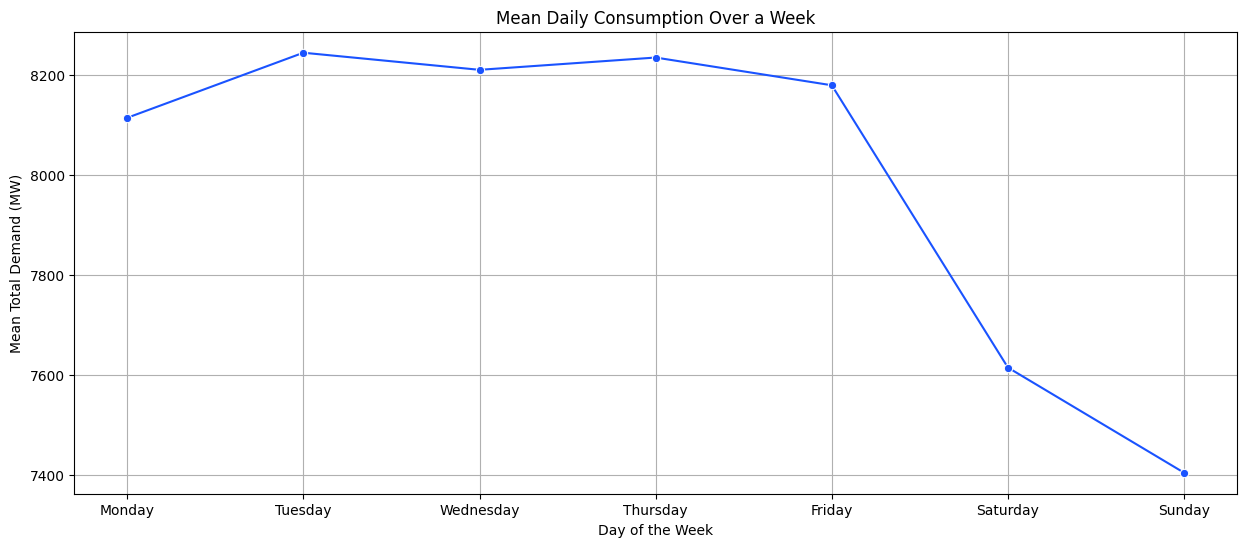

In [66]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=df_mean_demand_by_day, x='DayOfWeekName', y='TOTALDEMAND', marker='o', linestyle='-', color='#1a53ff')

plt.title('Mean Daily Consumption Over a Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Total Demand (MW)')

plt.grid(True)
plt.show()

In [ ]:
# Set start date and create list for first four weeks of January 2022
start_date = pd.to_datetime('2022-01-01')
weeks = [start_date + pd.Timedelta(days=7*i) for i in range(4)]


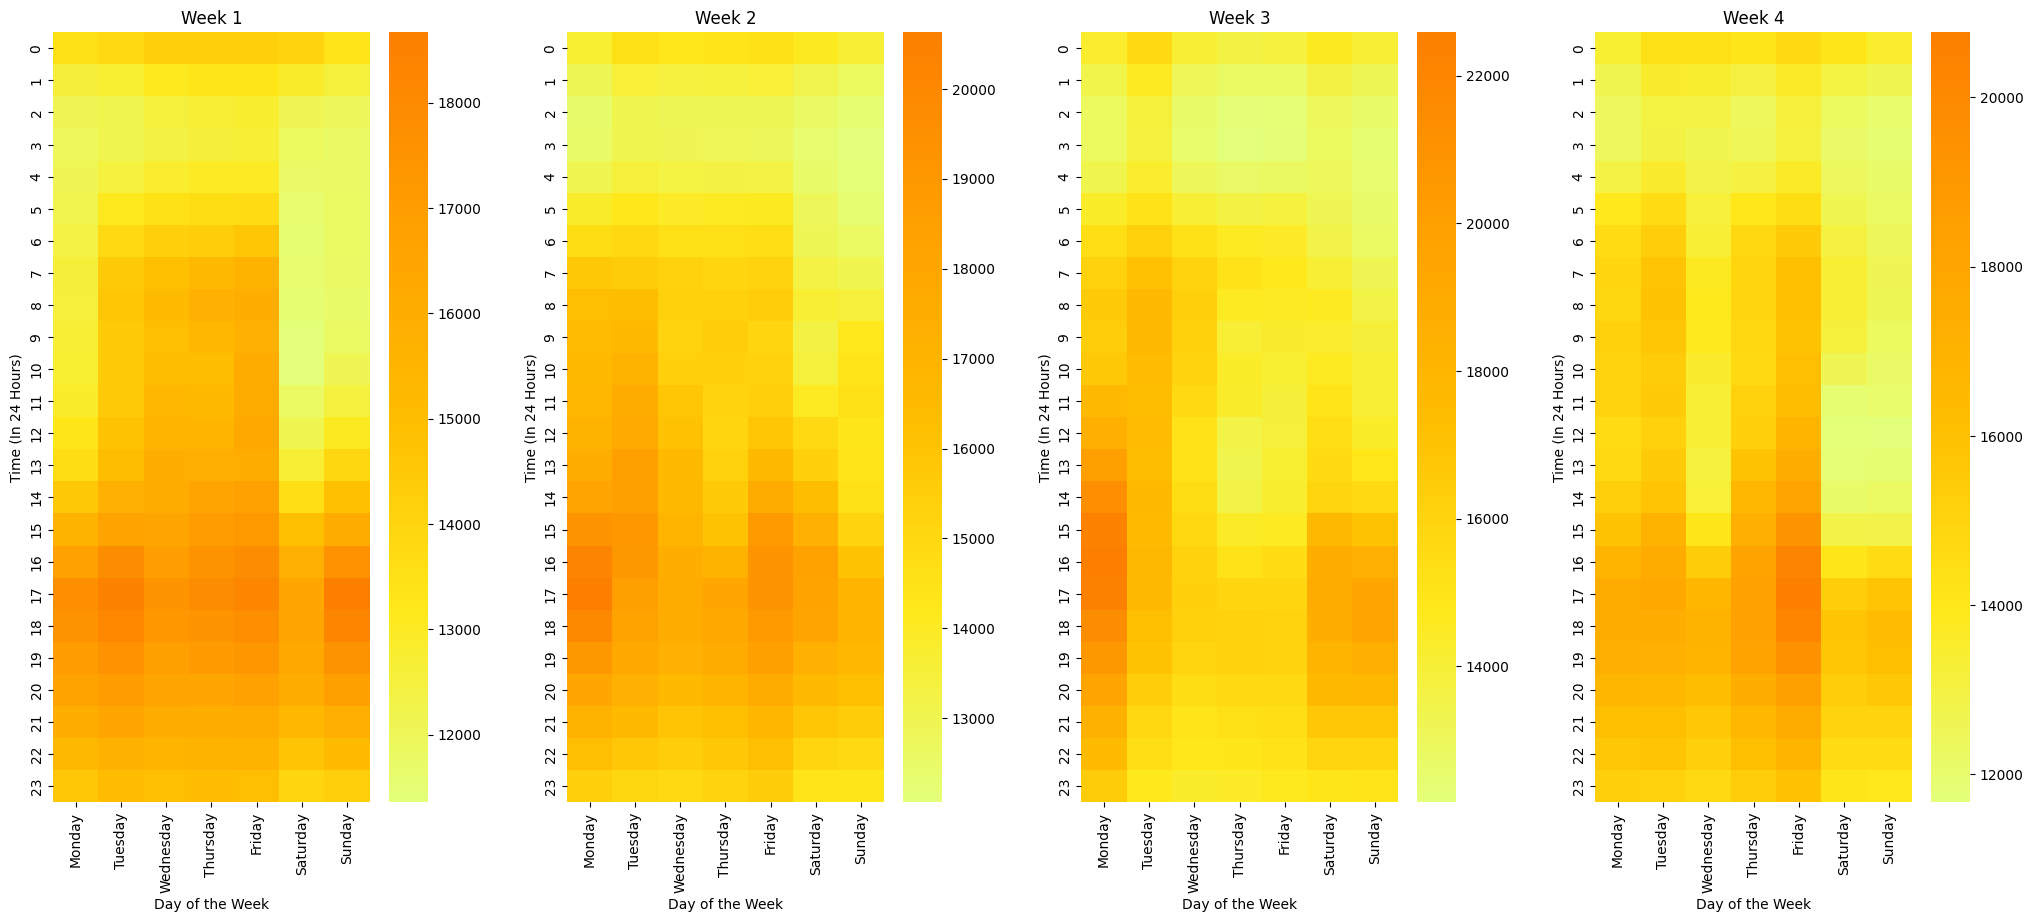

In [ ]:
def heatGen(data):
    dic = {hour: {day: 0 for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']} for hour in range(24)}

    for _, row in data.iterrows():
        hour = row['DATETIME'].hour
        weekday = row['DATETIME'].strftime('%A')
        dic[hour][weekday] += row['TOTALDEMAND']

    return pd.DataFrame(dic).T

# Generate heatmaps data for each week
heat_dfs = []
for week_start in weeks:
    week_end = week_start + pd.Timedelta(days=7)
    df_week = df_totaldemand_nsw[(df_totaldemand_nsw['DATETIME'] >= week_start) & (df_totaldemand_nsw['DATETIME'] < week_end)]
    heat_dfs.append(heatGen(df_week))

fig = plt.figure(figsize=(25, 10), facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 4, figure=fig, hspace=0.5, wspace=0.3)

for i, df_heat in enumerate(heat_dfs):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(df_heat, annot=False, cmap="Wistia", ax=ax)

    ax.set_title(f"Week {i+1}")
    ax.set_xlabel("Day of the Week")
    ax.set_ylabel("Time (In 24 Hours)")
    ax.set_xticklabels(df_heat.columns, rotation=90)
    ax.set_yticklabels(df_heat.index)

plt.show()


## Temperature Linear Model


In [77]:
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,28.8
1,2010,1,2,29.4
2,2010,1,3,21.5
3,2010,1,4,23.9
4,2010,1,5,27.7
...,...,...,...,...
20449,2023,12,27,27.1
20450,2023,12,28,31.2
20451,2023,12,29,26.7
20452,2023,12,30,27.9


Plotting mean annual temperature

In [82]:
from sklearn.linear_model import LinearRegression

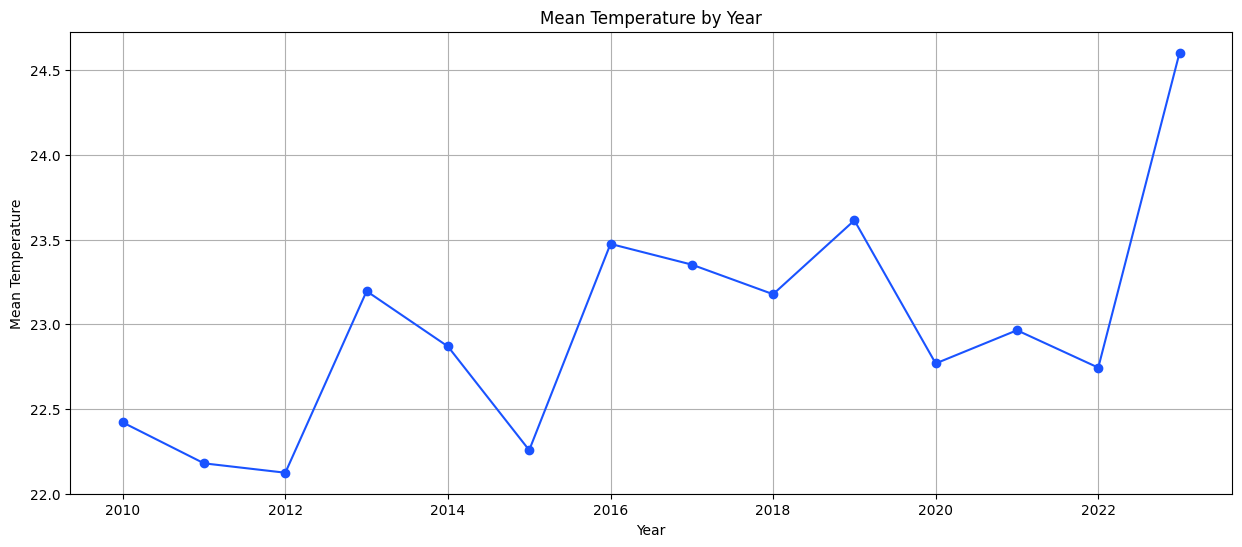

In [78]:
#Plot of mean temperature by year
mean_temp_by_year = df_temperature_nsw.groupby('year')['TEMPERATURE'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(mean_temp_by_year.index, mean_temp_by_year.values, marker='o', linestyle='-', color='#1a53ff')

plt.title('Mean Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')

plt.grid(True)
plt.show()

In [79]:
mean_temp_by_year

year
2010    22.420548
2011    22.178904
2012    22.123497
2013    23.195890
2014    22.869315
2015    22.256712
2016    23.474931
2017    23.352603
2018    23.177808
2019    23.613973
2020    22.768852
2021    22.964932
2022    22.744110
2023    24.604110
Name: TEMPERATURE, dtype: float64

In [80]:
annual_temp_nsw = mean_temp_by_year.to_frame().reset_index()
annual_temp_nsw.columns = ['year', 'temperature']
annual_temp_nsw

,year,temperature
0,2010,22.420548
1,2011,22.178904
2,2012,22.123497
3,2013,23.195890
4,2014,22.869315
5,2015,22.256712
6,2016,23.474931
7,2017,23.352603
8,2018,23.177808
9,2019,23.613973


Perform a linear regression



In [84]:
X = annual_temp_nsw[['year']]
y = annual_temp_nsw['temperature']

model = LinearRegression()
model.fit(X, y)

# future_years = np.arange(2024, 2034).reshape(-1, 1)
future_years = pd.DataFrame(np.arange(2024, 2034), columns=['year'])
future_temperatures = model.predict(future_years)

# 1 degree warmer by 2033
rate_of_change = 1
years_difference = 2033 - future_years.iloc[0][0]
future_temperatures_adjusted = future_temperatures + (rate_of_change / years_difference)

future_predictions = pd.Series(future_temperatures_adjusted.flatten(), index=future_years['year'], name='temperature')
print(future_predictions)

year
2024    23.843830
2025    23.943943
2026    24.044056
2027    24.144169
2028    24.244282
2029    24.344395
2030    24.444508
2031    24.544621
2032    24.644734
2033    24.744847
Name: temperature, dtype: float64


In [85]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: -178.89615406819976
Coefficient: [0.10011308]


This coefficent means: For every one-year increase, the temperature is expected to increase by approximately 0.1001 degrees Celsius.



In [93]:
#Combine historical and future projections
future_temp_nsw = future_predictions.to_frame().reset_index()
future_temp_nsw.columns = ['year', 'temperature']

df_temp_model = pd.concat([annual_temp_nsw, future_temp_nsw], ignore_index=True)
df_temp_model

,year,temperature
0,2010,22.420548
1,2011,22.178904
2,2012,22.123497
3,2013,23.195890
4,2014,22.869315
5,2015,22.256712
6,2016,23.474931
7,2017,23.352603
8,2018,23.177808
9,2019,23.613973


Plot linear model for temperature

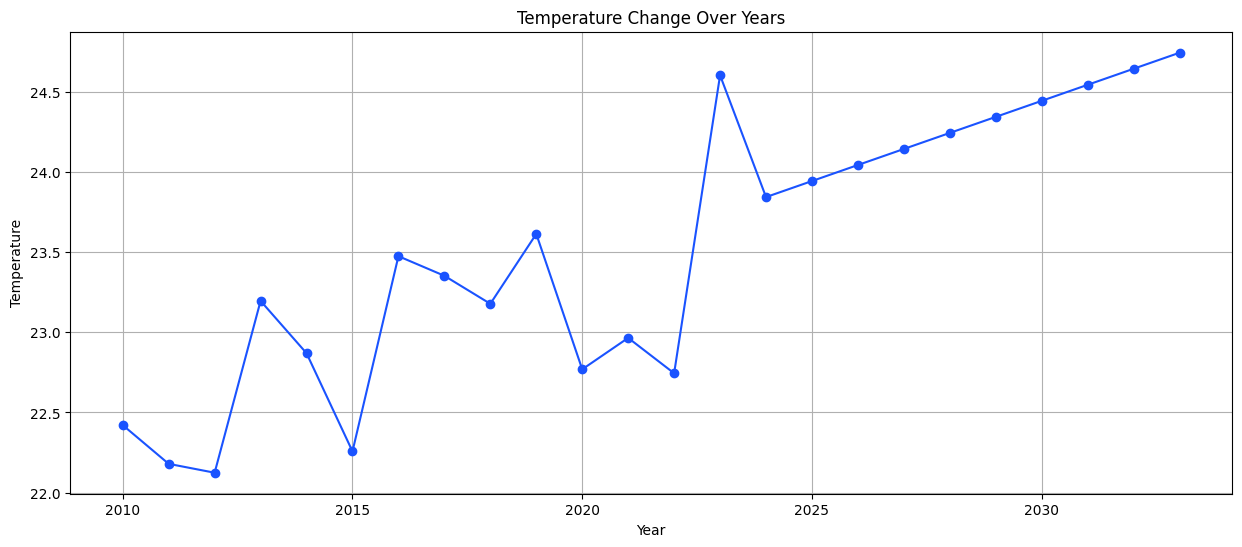

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df_temp_model['year'], df_temp_model['temperature'], marker='o', linestyle='-', color='#1a53ff')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Change Over Years')
plt.grid(True)
plt.show()

1. Preprocessing and Merging DataFrames: Convert DATETIME to year, and merge all DataFrames on the year.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [88]:
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,DayOfWeekName
0,2010-01-01 00:00:00,8038.000000,Friday
1,2010-01-01 00:30:00,7809.310000,Friday
2,2010-01-01 01:00:00,7483.690000,Friday
3,2010-01-01 01:30:00,7117.230000,Friday
4,2010-01-01 02:00:00,6812.030000,Friday
...,...,...,...
245419,2023-12-31 21:30:00,6971.670000,Sunday
245420,2023-12-31 22:00:00,6877.370000,Sunday
245421,2023-12-31 22:30:00,6795.615000,Sunday
245422,2023-12-31 23:00:00,6671.048333,Sunday


In [89]:
df_population_nsw

,year,population
0,1971,4725503
1,1972,4795106
2,1973,4841898
3,1974,4894053
4,1975,4932016
...,...,...
65,2036,9404886
66,2037,9498738
67,2038,9592466
68,2039,9686079


In [94]:
df_temp_model

,year,temperature
0,2010,22.420548
1,2011,22.178904
2,2012,22.123497
3,2013,23.195890
4,2014,22.869315
5,2015,22.256712
6,2016,23.474931
7,2017,23.352603
8,2018,23.177808
9,2019,23.613973


In [95]:
# Preprocessing to ensure data alignment
df_totaldemand_nsw['year'] = pd.to_datetime(df_totaldemand_nsw['DATETIME']).dt.year
df_demand_yearly = df_totaldemand_nsw.groupby('year')['TOTALDEMAND'].mean().reset_index(name='totaldemand')

In [96]:
df_demand_yearly

,year,totaldemand
0,2010,8807.185635
1,2011,8728.294505
2,2012,8253.294400
3,2013,7981.591276
4,2014,7917.803791
5,2015,7979.758276
6,2016,7977.977169
7,2017,8053.874665
8,2018,7999.896567
9,2019,7964.552680


In [97]:
years_extension = range(2024, 2034)  # Up to 2033, inclusive
df_demand_extension = pd.DataFrame({
    'year': years_extension,
    'totaldemand': [None] * len(years_extension)  # Use None for now, will be set to 0 later
})

In [98]:
df_demand_yearly_extended = pd.concat([df_demand_yearly, df_demand_extension], ignore_index=True)
df_merged = pd.merge(df_demand_yearly_extended, df_temp_model, on='year', how='inner')
df_combined_new = pd.merge(df_merged, df_population_nsw, on='year', how='inner')
df_combined_new = df_combined_new[(df_combined_new['year'] >= 2010) & (df_combined_new['year'] <= 2033)]
df_combined_new.loc[df_combined_new['year'] >= 2024, 'totaldemand'] = 0

In [99]:
df_combined_new

,year,totaldemand,temperature,population
0,2010,8807.185635,22.420548,7144292
1,2011,8728.294505,22.178904,7218529
2,2012,8253.294400,22.123497,7304244
3,2013,7981.591276,23.195890,7404032
4,2014,7917.803791,22.869315,7508353
5,2015,7979.758276,22.256712,7616168
6,2016,7977.977169,23.474931,7732858
7,2017,8053.874665,23.352603,7867936
8,2018,7999.896567,23.177808,7980168
9,2019,7964.552680,23.613973,8087379


In [100]:
# Merge the DataFrames on year
df_combined = pd.merge(df_demand_yearly, df_population_nsw, on='year', how='inner')
df_combined = pd.merge(df_combined, df_temp_model, on='year', how='inner')

In [101]:
df_combined

,year,totaldemand,population,temperature
0,2010,8807.185635,7144292,22.420548
1,2011,8728.294505,7218529,22.178904
2,2012,8253.294400,7304244,22.123497
3,2013,7981.591276,7404032,23.195890
4,2014,7917.803791,7508353,22.869315
5,2015,7979.758276,7616168,22.256712
6,2016,7977.977169,7732858,23.474931
7,2017,8053.874665,7867936,23.352603
8,2018,7999.896567,7980168,23.177808
9,2019,7964.552680,8087379,23.613973


## Correlations

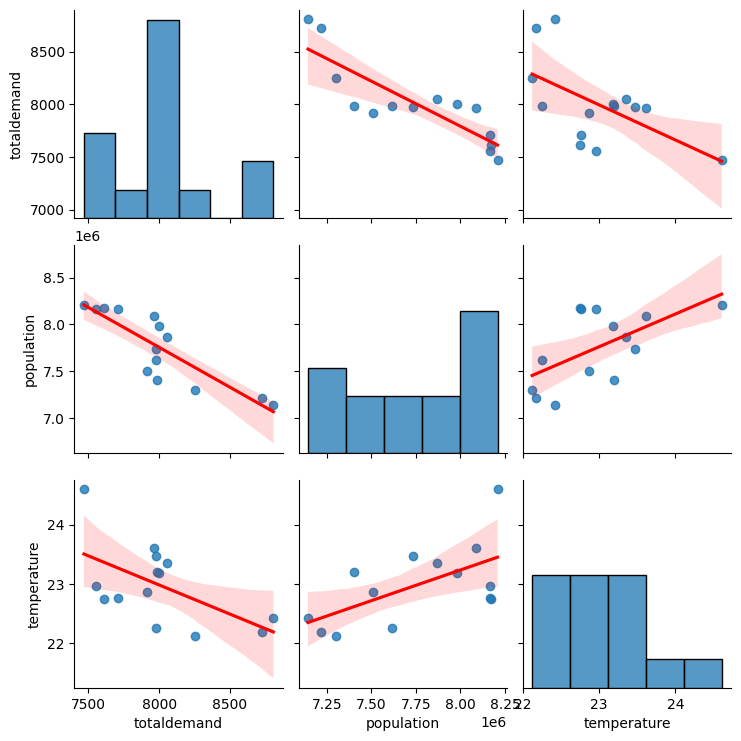

In [ ]:
sns.pairplot(df_combined[['totaldemand','population','temperature']], kind="reg", plot_kws={'line_kws':{'color':'red'}})

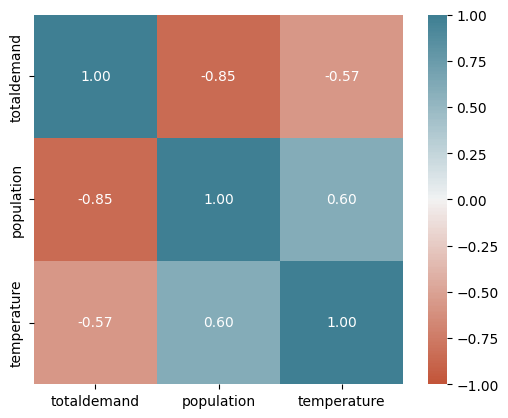

In [ ]:
corr = df_combined[['totaldemand','population','temperature']].corr()
ax = sns.heatmap(
    corr,
    annot=True, fmt='.2f',
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

## Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [103]:
# Separate features and target variable
X = df_combined_new[['temperature', 'population']]
y = df_combined_new['totaldemand']

In [104]:
# Split data into training and test sets without shuffling
train_X = X[df_combined_new['year'] < 2024]
test_X = X[df_combined_new['year'] >= 2024]
train_y = y[df_combined_new['year'] < 2024]
test_y = y[df_combined_new['year'] >= 2024]

In [105]:
# Further split training set into training and validation sets without shuffling
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=False)

In [106]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [107]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-5.21423403e+01 -6.87171829e-04]
Intercept: 14566.216359223496


In [109]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [110]:
# Evaluate the model on the training data
train_predictions = model.predict(train_X)
train_rmse = np.sqrt(mean_squared_error(train_y, train_predictions))
train_r2 = r2_score(train_y, train_predictions)
train_mae = mean_absolute_error(train_y, train_predictions)
train_mape = mean_absolute_percentage_error(train_y, train_predictions)

print(f"Training Data Metrics:")
print(f"RMSE: {train_rmse:.3f}")
print(f"R^2: {train_r2:.3f}")
print(f"MAE: {train_mae:.3f}")
print(f"MAPE: {train_mape:.3f}%")

Training Data Metrics:
RMSE: 208.012
R^2: 0.594
MAE: 186.045
MAPE: 2.268%


In [ ]:
# Make predictions on the test set
test_predictions = model.predict(test_X)

In [ ]:
print("\nPredicted totaldemand values for missing years:\n")
print("year\ttotaldemand")
for idx, pred in zip(test_X.index, test_predictions):
    year = df_combined_new.loc[idx, 'year']
    print(f"{year}\t{pred:.3f}")



Predicted totaldemand values for missing years:

year	totaldemand
2024	7639.074
2025	7567.966
2026	7497.126
2027	7426.821
2028	7357.113
2029	7287.851
2030	7218.013
2031	7147.457
2032	7077.236
2033	7007.161


### Old Code

In [ ]:
# Splitting data for model evaluation 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set for evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

In [ ]:
# Future prediction setup
df_future = df_population_nsw.merge(df_temp_model, on='year')
df_future = df_future[(df_future['year'] >= 2024) & (df_future['year'] <= 2033)]

# Predicting future demand
future_demand = model.predict(df_future[['population', 'temperature']])

# Creating a DataFrame for future predictions
df_future_demand = pd.DataFrame({
    'year': df_future['year'],
    'predicted_demand': future_demand
})

In [ ]:
def calculate_metrics(y_true, y_pred, name=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    psrint(f"MAPE: {mape:.2f}%")
    print("\n")

# Calculate metrics for both training and testing sets
calculate_metrics(y_train, y_train_pred, "Training")
calculate_metrics(y_test, y_test_pred, "Testing")

Training
RMSE: 171.01
R^2: 0.71
MAE: 143.82
MAPE: 1.77%


Testing
RMSE: 290.16
R^2: 0.69
MAE: 271.51
MAPE: 3.28%




## LSTM Model

In [111]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_combined[['population', 'temperature', 'totaldemand']])

# Split into train and test sets (70:30)
train_size = int(len(scaled_features) * 0.7)
test_size = len(scaled_features) - train_size
train, test = scaled_features[0:train_size,:], scaled_features[train_size:len(scaled_features),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0:2]  # Selecting features
        X.append(a)
        Y.append(dataset[i + look_back, 2])  # Selecting target
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1 with specified look_back period
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, 2))) # 2 features: population and temperature
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model with verbose set to 0 for less output
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform for predictions and actual values to get original scale
trainPredict_extended = np.zeros((len(y_train_pred),3))
trainPredict_extended[:,2] = y_train_pred[:,0]
y_train_pred = scaler.inverse_transform(trainPredict_extended)[:,2]

testPredict_extended = np.zeros((len(y_test_pred),3))
testPredict_extended[:,2] = y_test_pred[:,0]
y_test_pred = scaler.inverse_transform(testPredict_extended)[:,2]

# Inverse transform for the actual values
y_train_extended = np.zeros((len(y_train),3))
y_train_extended[:,2] = y_train
y_train = scaler.inverse_transform(y_train_extended)[:,2]

y_test_extended = np.zeros((len(y_test),3))
y_test_extended[:,2] = y_test
y_test = scaler.inverse_transform(y_test_extended)[:,2]

# Re-define the calculate_metrics function to handle numpy arrays
def calculate_metrics(y_true, y_pred, name=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R^2: {r2:.2f}")
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} MAPE: {mape:.2f}%")
    print()

calculate_metrics(y_train, y_train_pred, "Training")
calculate_metrics(y_test, y_test_pred, "Testing")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Epoch 1/100
7/7 - 2s - loss: 0.2737 - 2s/epoch - 283ms/step
Epoch 2/100
7/7 - 0s - loss: 0.2648 - 29ms/epoch - 4ms/step
Epoch 3/100
7/7 - 0s - loss: 0.2561 - 28ms/epoch - 4ms/step
Epoch 4/100
7/7 - 0s - loss: 0.2479 - 34ms/epoch - 5ms/step
Epoch 5/100
7/7 - 0s - loss: 0.2397 - 33ms/epoch - 5ms/step
Epoch 6/100
7/7 - 0s - loss: 0.2326 - 31ms/epoch - 4ms/step
Epoch 7/100
7/7 - 0s - loss: 0.2249 - 27ms/epoch - 4ms/step
Epoch 8/100
7/7 - 0s - loss: 0.2172 - 26ms/epoch - 4ms/step
Epoch 9/100
7/7 - 0s - loss: 0.2099 - 27ms/epoch - 4ms/step
Epoch 10/100
7/7 - 0s - loss: 0.2034 - 28ms/epoch - 4ms/step
Epoch 11/100
7/7 - 0s - loss: 0.1962 - 39ms/epoch - 6ms/step
Epoch 12/100
7/7 - 0s - loss: 0.1895 - 25ms/epoch - 4ms/step
Epoch 13/100
7/7 - 0s - loss: 0.1829 - 31ms/epoch - 4ms/step
Epoch 14/100
7/7 - 0s - loss: 0.1762 - 30ms/epoch - 4ms/step
Epoch 15/100
7/7 - 0s - loss: 0.1696 - 25ms/epoch - 4ms/step
Epoch 16/100
7/7 - 0s - loss: 0.1643 - 24ms/epoch - 3ms/step
Epoch 17/100
7/7 - 0s - loss: 0.1

## ARIMA Model

In [112]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# Use only the 'TOTALDEMAND' column for ARIMA
data = df_demand_yearly['totaldemand'].values

# Split the dataset into train and test sets
train_size = int(len(data) * 0.6)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train, label='Train')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test')
plt.plot(np.arange(len(train), len(train) + len(test)), forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

## Pairs Plot

<Figure size 1500x600 with 0 Axes>

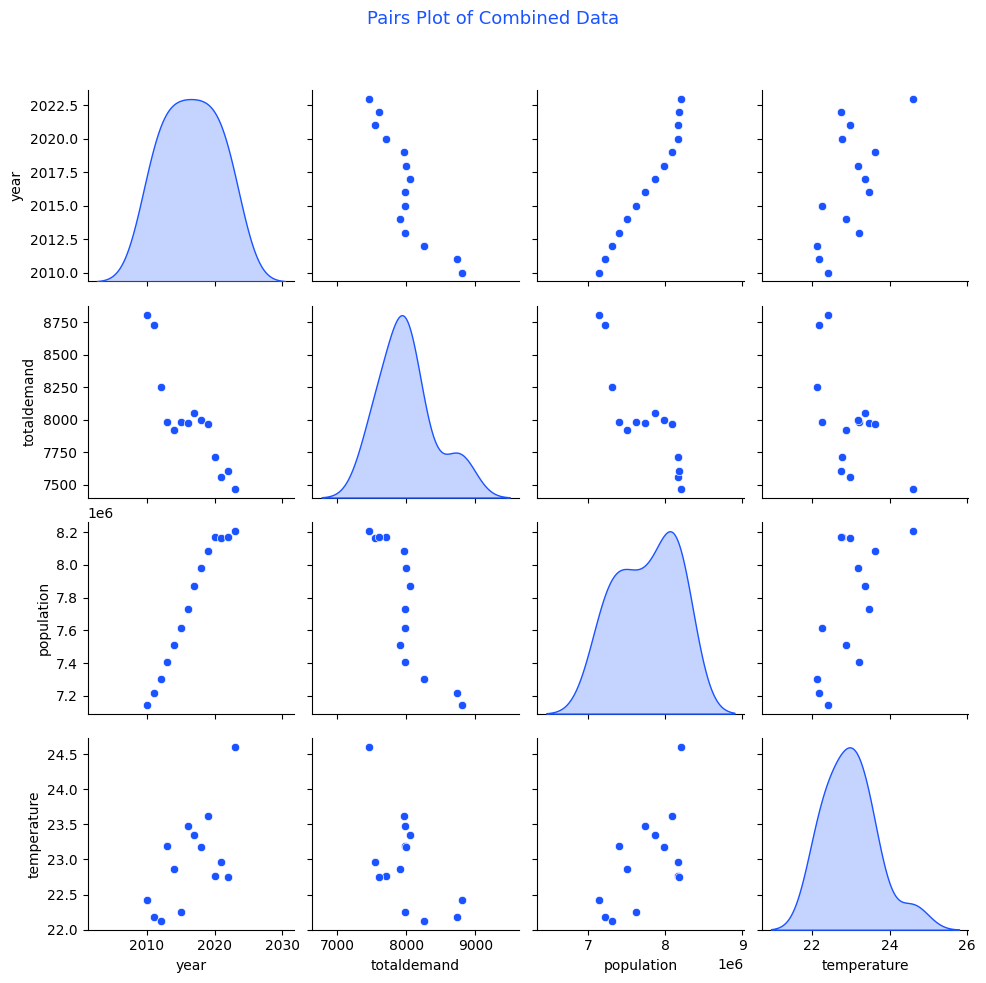

In [ ]:
# Generate a pairs plot
plt.figure(figsize=(15, 6))
sns.pairplot(df_combined, diag_kind='kde',
             plot_kws={'color': "#1a53ff"},
             diag_kws={'color': "#1a53ff"})

plt.subplots_adjust(top=0.9)
plt.suptitle('Pairs Plot of Combined Data', fontsize=13, color='#1a53ff')

plt.show()
